(49980, 1) (49980, 4997) (49980, 1)
tf.Tensor(2.8344743, shape=(), dtype=float32)


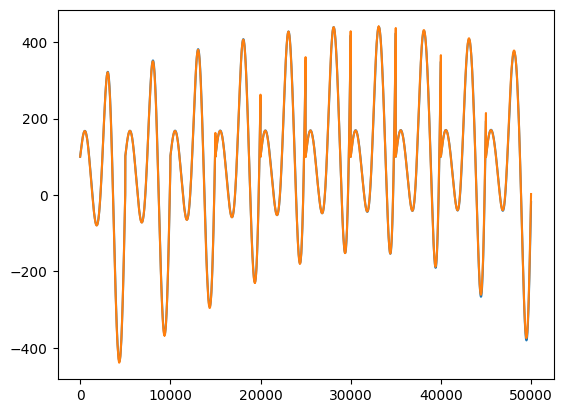

In [6]:
import scipy.io
import numpy as np
import tensorflow as tf
import time
#import tensorflow_addons as tfa
from matplotlib import pyplot as plt
tf.random.set_seed(1234)
np.random.seed(1234)

name = 'noise_state_m0_d0.01_filter'

name = '10'


file_name='data/Chaotic_%s.npz' %name  
model_name ='model/Chaotic_Onet+ML_%s' %name

mat = np.load(file_name)
x = mat['arr_0'][:,1:-1] # system state 8000
dx = mat['arr_1'][:,1:-1]
u=mat['arr_3'][:,1:-2] # control input 7999
time_index=np.arange(0.001, 5, 0.001).reshape(1,4999) # time index 8001
dt=0.001 # sampling period
t=np.tile(time_index[:,:-1], (x.shape[0], 1))

mag = 100
in_t= t.flatten()[:, np.newaxis]
in_u= np.repeat(u, t.shape[1],axis = 0)
out_x = x[:,:].flatten()[:, np.newaxis]*mag
print(in_t.shape, in_u.shape, out_x.shape)
model=tf.keras.models.load_model(model_name, compile=False)
predict = model([in_u,in_t])
train_loss = tf.reduce_mean(tf.abs(predict-out_x))
print(train_loss)
plt.plot(out_x)
plt.plot(predict)


In [31]:
model_list = ['Chaotic_Onet+ML_10',
    'Chaotic_Onet+ML_noise_state_m0_d0.01_filter',
             'Chaotic_Onet+ML_noise_state_m0_d0.03_filter',
                 'Chaotic_Onet+ML_noise_state_m0_d0.05_filter',
                 'Chaotic_Onet+ML_noise_control_m0_d1_filter',
                 'Chaotic_Onet+ML_noise_control_m0.05_d1_filter',
                 'Chaotic_Onet+ML_noise_control_m0_d5_filter',
                 'Chaotic_Onet+ML_noise_control_m0.05_d5_filter']

model_list = ['Chaotic_Onet_10',
    'Chaotic_Onet_noise_state_m0_d0.01_filter',
             'Chaotic_Onet_noise_state_m0_d0.03_filter',
                 'Chaotic_Onet_noise_state_m0_d0.05_filter',
                 'Chaotic_Onet_noise_control_m0_d1_filter',
                 'Chaotic_Onet_noise_control_m0.05_d1_filter',
                 'Chaotic_Onet_noise_control_m0_d5_filter',
                 'Chaotic_Onet_noise_control_m0.05_d5_filter']

mat_val = np.load("data/Chaotic_5.npz")


# plt.figure(figsize=(15, 8))

for loop_index in range(len(model_list)):
    
    model_name = model_list[loop_index] 


    model_name ='model/%s' %model_name
    model=tf.keras.models.load_model(model_name, compile=False)
    x_v  = mat_val ['arr_0'][:,1:-1] # system state 8000
    dx_v  = mat_val ['arr_1'][:,1:-1]
    u_v=mat_val ['arr_3'][:,1:-2] # control input 7999

    MAE_ALL= 0
    for index in range (5):


        x_val = x_v[index,:][ np.newaxis,:] # system state
        u_val=  u_v[index,:] [np.newaxis,:] # control input

        in_t1_val=time_index[:,:].flatten()[:, np.newaxis]  #t-1
        # in_t2_val=time_index[:,1:-1].flatten()[:, np.newaxis]#t
        # in_t3_val=time_index[:,2:].flatten()[:, np.newaxis] #t+1

        in_u_val= np.repeat(u_val, in_t1_val.shape[0],axis = 0)
        out_x1_val = x_val[:,:].flatten()[:, np.newaxis]*mag #x_t-1
        # out_x2_val = x_val[:,1:-1].flatten()[:, np.newaxis]*mag #x_t
        # out_x3_val = x_val[:,2:].flatten()[:, np.newaxis]*mag #x_t


        # total_out_val = np.concatenate((out_x1_val,out_x2_val,out_x3_val,ML_x_val),axis=-1)
        # print(in_t1_val.shape, in_u_val.shape, ML_u_val.shape, out_x2_val.shape,total_out_val.shape)

        pre_val = model([in_u_val,in_t1_val])

    #     plt.subplot(2, 5, index+1)

    #     plt.title('%d'%index)
    #     plt.plot(pre_val[:,0]) #onet
    #     plt.plot(out_x1_val[:,0])
        MAE = tf.reduce_mean(tf.abs(pre_val[:4997,0]-out_x1_val[:4997,0]))
    #     print(MAE)
        MAE_ALL += MAE


#     plt.show()

    print(MAE_ALL/5)

tf.Tensor(20.574322, shape=(), dtype=float32)
tf.Tensor(26.933826, shape=(), dtype=float32)
tf.Tensor(28.421911, shape=(), dtype=float32)
tf.Tensor(34.606422, shape=(), dtype=float32)
tf.Tensor(35.014626, shape=(), dtype=float32)
tf.Tensor(35.629658, shape=(), dtype=float32)
tf.Tensor(42.014236, shape=(), dtype=float32)
tf.Tensor(94.15253, shape=(), dtype=float32)


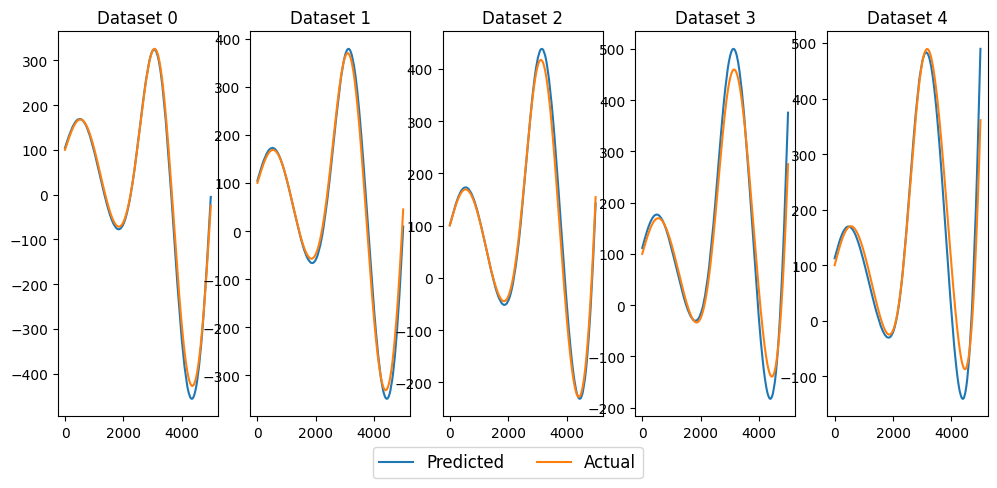

tf.Tensor(83.35415, shape=(), dtype=float32)


In [7]:
mat_val = np.load("data/Chaotic_5.npz")

x_v  = mat_val ['arr_0'][:,1:-1] # system state 8000
dx_v  = mat_val ['arr_1'][:,1:-1]
u_v=mat_val ['arr_3'][:,1:-2] # control input 7999

MAE_ALL= 0
x = np.linspace(0, 4997, 4997)
fig, axs = plt.subplots(1, 5, figsize=(12, 5))  # 2 rows, 1 column
for index in range (5):


    x_val = x_v[index,:][ np.newaxis,:] # system state
    u_val=  u_v[index,:] [np.newaxis,:] # control input

    in_t1_val=time_index[:,:].flatten()[:, np.newaxis]  #t-1
    # in_t2_val=time_index[:,1:-1].flatten()[:, np.newaxis]#t
    # in_t3_val=time_index[:,2:].flatten()[:, np.newaxis] #t+1

    in_u_val= np.repeat(u_val, in_t1_val.shape[0],axis = 0)
    out_x1_val = x_val[:,:].flatten()[:, np.newaxis]*mag #x_t-1
    # out_x2_val = x_val[:,1:-1].flatten()[:, np.newaxis]*mag #x_t
    # out_x3_val = x_val[:,2:].flatten()[:, np.newaxis]*mag #x_t

 
    # total_out_val = np.concatenate((out_x1_val,out_x2_val,out_x3_val,ML_x_val),axis=-1)
    # print(in_t1_val.shape, in_u_val.shape, ML_u_val.shape, out_x2_val.shape,total_out_val.shape)

    pre_val = model([in_u_val,in_t1_val])
    axs[index].plot(x, pre_val[:4997,0], label="Predicted")
    axs[index].plot(x, out_x1_val[:4997,0], label="Actual")
    axs[index].set_title( 'Dataset %d'%index)

#     plt.subplot(2, 5, index+1)

#     plt.title('%d'%index)
#     plt.plot(pre_val[:,0]) #onet
#     plt.plot(out_x1_val[:,0])
    MAE = tf.reduce_mean(tf.abs(pre_val[:4997,0]-out_x1_val[:4997,0]))
#     print(MAE)
    MAE_ALL += MAE
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc="lower center", ncol=2, fontsize='large', bbox_to_anchor=(0.5, -0.03))
plt.show() 
   
plt.show()

print(MAE_ALL)

(8000, 1) (8000, 8000) (8000, 1)


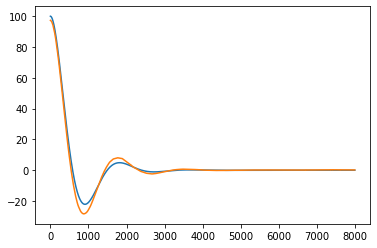

In [ ]:
mat_val = scipy.io.loadmat("../data/pendulum1_test3.mat")
x_val = mat_val['a_test'] # system state
u_val=mat_val['u_test'] # control input
t_val=mat_val['i'][:,1:]
val_t = t_val.flatten()[:, np.newaxis]
val_u= np.repeat(u_val, 8000,axis = 0)
val_x = x_val[:,1:].flatten()[:, np.newaxis]*mag
print(val_t.shape, val_u.shape, val_x.shape)
val_predict =  model_test([val_u,val_t])
plt.plot(val_x)
plt.plot(val_predict)